In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler

# Load dataset from CSV file
df = pd.read_csv('cc_dataset.csv')

# Drop rows with missing values to avoid errors during training
df.dropna(inplace=True)

# Define features and target variable
feature_cols = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'track_genre']

min_popularity = df['popularity'].min()
max_popularity = df['popularity'].max()

# Step 2: Calculate the bin width using K = 18
K = 18  # Number of bins
bin_width = (max_popularity - min_popularity) / K

# Step 3: Create the bin edges
bins = np.arange(min_popularity, max_popularity + bin_width, bin_width)
labels = [f'Bin_{i}' for i in range(1, len(bins))]

# Create bins for the target variable 'popularity' to reduce processing time
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)
df = df.dropna(subset=feature_cols + ['popularity_category'])

X = df[feature_cols]  # Features
y = df['popularity_category'].astype(str)  # Binned target variable

In [3]:
# Split dataset into training set and test set (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
dtc = DecisionTreeClassifier(max_depth=5)

# Train the classifier
model = dtc.fit(X_train, y_train)

# Predict on test dataset
y_pred = dtc.predict(X_test)

# Predict on training set to check for overfitting
train_predict = dtc.predict(X_train)

# Output accuracy
print(f"Default Decision tree")
print(f"Accuracy train: {metrics.accuracy_score(y_train, train_predict)}")
print(f"Accuracy test: {metrics.accuracy_score(y_test, y_pred)}")

# Create Random Forest Classifier object (with 20 estimators)
forest = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=1)

# Perform cross-validation for Random Forest (with 20 estimators)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(forest, X, y, cv=5)
print(f"Cross-validation scores (20 estimators): {cv_scores}")
print(f"Mean cross-validation score (20 estimators): {cv_scores.mean()}")

# Train and evaluate Random Forest with more estimators for comparison
forest_more_estimators = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Perform cross-validation for Random Forest (with more estimators)
cv_scores_more = cross_val_score(forest_more_estimators, X, y, cv=5)
print(f"Cross-validation scores (100 estimators): {cv_scores_more}")
print(f"Mean cross-validation score (100 estimators): {cv_scores_more.mean()}")
forest_more_estimators.fit(X_train, y_train)

# Predict on test dataset
y_test_pred_more = forest_more_estimators.predict(X_test)

# Predict on training set
y_train_pred_more = forest_more_estimators.predict(X_train)

# Output accuracy
forest_train_more = metrics.accuracy_score(y_train, y_train_pred_more)
forest_test_more = metrics.accuracy_score(y_test, y_test_pred_more)
print(f"Test Two (more estimators, adjusted max depth): Accuracy of testing: {forest_test_more}")
print(f"Random forest train / test accuracies (more estimators, adjusted max depth): {forest_train_more} / {forest_test_more}")  # Play with the number of estimators
forest.fit(X_train, y_train)

# Create Random Forest Classifier object (with 20 estimators)
forest = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=1)

# Perform cross-validation for Random Forest (with 20 estimators)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(forest, X, y, cv=5)
print(f"Cross-validation scores (20 estimators): {cv_scores}")
print(f"Mean cross-validation score (20 estimators): {cv_scores.mean()}")

# Train and evaluate Random Forest with more estimators for comparison
forest_more_estimators = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Perform cross-validation for Random Forest (with more estimators)
cv_scores_more = cross_val_score(forest_more_estimators, X, y, cv=5)
print(f"Cross-validation scores (100 estimators): {cv_scores_more}")
print(f"Mean cross-validation score (100 estimators): {cv_scores_more.mean()}")
forest_more_estimators.fit(X_train, y_train)

Default Decision tree
Accuracy train: 0.42669334095455846
Accuracy test: 0.39666666666666667


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (20 estimators): [0.348     0.372     0.33      0.342     0.3043043]
Mean cross-validation score (20 estimators): 0.3392608608608609


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (100 estimators): [0.371      0.425      0.37       0.395      0.31531532]
Mean cross-validation score (100 estimators): 0.375263063063063
Test Two (more estimators, adjusted max depth): Accuracy of testing: 0.38333333333333336
Random forest train / test accuracies (more estimators, adjusted max depth): 0.4369819948556731 / 0.38333333333333336


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (20 estimators): [0.348     0.372     0.33      0.342     0.3043043]
Mean cross-validation score (20 estimators): 0.3392608608608609


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (100 estimators): [0.371      0.425      0.37       0.395      0.31531532]
Mean cross-validation score (100 estimators): 0.375263063063063


RandomForestClassifier(max_depth=5, random_state=1)

In [4]:
# Predict on test dataset
y_test_pred_more = forest_more_estimators.predict(X_test)

# Predict on training set
y_train_pred_more = forest_more_estimators.predict(X_train)

# Output accuracy
forest_train_more = metrics.accuracy_score(y_train, y_train_pred_more)
forest_test_more = metrics.accuracy_score(y_test, y_test_pred_more)
print(f"Test Two (more estimators, adjusted max depth): Accuracy of testing: {forest_test_more}")
print(f"Random forest train / test accuracies (more estimators, adjusted max depth): {forest_train_more} / {forest_test_more}")  # Play with the number of estimators
forest.fit(X_train, y_train)

# Predict on test dataset
y_test_pred = forest.predict(X_test)

# Predict on training set
y_train_pred = forest.predict(X_train)

# Output accuracy
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
print(f"Test One : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}")

# Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Output best parameters from GridSearchCV
'''
bootstrap: True
max_depth: 15
max_features: 'sqrt'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
'''


Test Two (more estimators, adjusted max depth): Accuracy of testing: 0.38333333333333336
Random forest train / test accuracies (more estimators, adjusted max depth): 0.4369819948556731 / 0.38333333333333336
Test One : Accuracy of testing: 0.346
Random forest train / test accuracies: 0.37982280651614747 / 0.346
Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto,

KeyboardInterrupt: 

In [5]:

# Train the best model using the manually provided best parameters
best_forest = RandomForestClassifier(bootstrap=True, max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=1)
best_forest.fit(X_train, y_train)

y_test_pred_best = best_forest.predict(X_test)
forest_test_best = metrics.accuracy_score(y_test, y_test_pred_best)
print(f"Accuracy of the best Random Forest model: {forest_test_best}")

# Visualize the decision tree
class_names = [str(i) for i in sorted(df['popularity_category'].unique())]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spotifyTree.png')
# Image(graph.create_png())


Accuracy of the best Random Forest model: 0.444


True

## KNN 

Default Decision Tree
Accuracy train: 0.42669334095455846
Accuracy test: 0.39666666666666667


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (Best Parameters): [0.395      0.526      0.39       0.454      0.34634635]
Mean cross-validation score (Best Parameters): 0.4222692692692693
Best Random Forest Model - Train Accuracy: 0.9837096313232352
Best Random Forest Model - Test Accuracy: 0.444
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Cross-validation scores (Best KNN): [0.274      0.385      0.254      0.326      0.23323323]
Mean cross-validation score (Best KNN): 0.29444664664664666
Best KNN Model - Train Accuracy: 0.9902829379822806
Best KNN Model - Test Accuracy: 0.30866666666666664


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


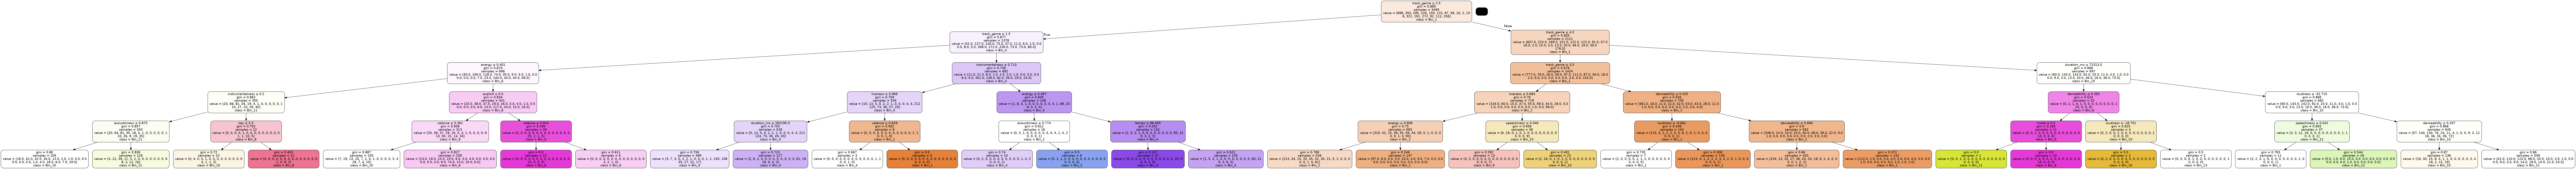

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean,

In [6]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Load dataset from CSV file
df = pd.read_csv('cc_dataset.csv')

# Drop rows with missing values to avoid errors during training
df.dropna(inplace=True)

# Define features and target variable
feature_cols = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'track_genre']

# Create bins for the target variable 'popularity' to reduce processing time
df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])
df = df.dropna(subset=feature_cols + ['popularity_category'])

X = df[feature_cols]  # Features
y = df['popularity_category'].astype(str)  # Binned target variable

# Split dataset into training set and test set (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
dtc = DecisionTreeClassifier(max_depth=5)
'''
# Train the classifier
dtc.fit(X_train, y_train)

# Predict on test dataset
y_pred = dtc.predict(X_test)

# Predict on training set to check for overfitting
train_predict = dtc.predict(X_train)

# Output accuracy
print(f"Default Decision Tree")
print(f"Accuracy train: {metrics.accuracy_score(y_train, train_predict)}")
print(f"Accuracy test: {metrics.accuracy_score(y_test, y_pred)}")

# Create Random Forest Classifier object with best parameters from GridSearchCV
best_forest_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'bootstrap': True,
    'random_state': 1
}

best_forest = RandomForestClassifier(**best_forest_params)

# Perform cross-validation for the Random Forest with best parameters
cv_scores_best = cross_val_score(best_forest, X, y, cv=5)
print(f"Cross-validation scores (Best Parameters): {cv_scores_best}")
print(f"Mean cross-validation score (Best Parameters): {cv_scores_best.mean()}")

# Train the best model
best_forest.fit(X_train, y_train)

# Predict on test dataset with best model
y_test_pred_best = best_forest.predict(X_test)

# Predict on training set with best model
y_train_pred_best = best_forest.predict(X_train)

# Output accuracy for best Random Forest model
forest_train_best = metrics.accuracy_score(y_train, y_train_pred_best)
forest_test_best = metrics.accuracy_score(y_test, y_test_pred_best)
print(f"Best Random Forest Model - Train Accuracy: {forest_train_best}")
print(f"Best Random Forest Model - Test Accuracy: {forest_test_best}")

# KNN Classifier with GridSearchCV for hyperparameter tuning
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Output best parameters from GridSearchCV for KNN
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Train the best KNN model
best_knn = grid_search_knn.best_estimator_

# Perform cross-validation for the best KNN model
cv_scores_knn = cross_val_score(best_knn, X, y, cv=5)
print(f"Cross-validation scores (Best KNN): {cv_scores_knn}")
print(f"Mean cross-validation score (Best KNN): {cv_scores_knn.mean()}")

# Train the best KNN model
best_knn.fit(X_train, y_train)

# Predict on test dataset with best KNN model
y_test_pred_knn = best_knn.predict(X_test)

# Predict on training set with best KNN model
y_train_pred_knn = best_knn.predict(X_train)

# Output accuracy for best KNN model
knn_train_best = metrics.accuracy_score(y_train, y_train_pred_knn)
knn_test_best = metrics.accuracy_score(y_test, y_test_pred_knn)
print(f"Best KNN Model - Train Accuracy: {knn_train_best}")
print(f"Best KNN Model - Test Accuracy: {knn_test_best}")

# Visualize the decision tree (optional)
class_names = [str(i) for i in sorted(df['popularity_category'].unique())]
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('KNNspotifyTree2.png')
Image(graph.create_png())


#### RandomForestClassifier

In [6]:
forest = RandomForestClassifier(n_estimators=20,max_depth=3, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test One : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

Test One : Accuracy of testing: 0.346
Random forest train / test accuracies: 0.37982280651614747 / 0.346


In [7]:
forest = RandomForestClassifier(n_estimators=2000,max_depth=20, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test Two : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

Test Two : Accuracy of testing: 0.4573333333333333
Random forest train / test accuracies: 0.9902829379822806 / 0.4573333333333333


In [8]:
forest = RandomForestClassifier(n_estimators=20,max_depth=1000, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test 3 : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

Test 3 : Accuracy of testing: 0.44266666666666665
Random forest train / test accuracies: 0.9879965704486996 / 0.44266666666666665


In [9]:
forest = RandomForestClassifier(n_estimators=90,max_depth=30, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test 4 : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

Test 4 : Accuracy of testing: 0.45
Random forest train / test accuracies: 0.9902829379822806 / 0.45


In [10]:
forest = RandomForestClassifier(n_estimators=90,max_depth=300, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test 5 : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

Test 5 : Accuracy of testing: 0.44666666666666666
Random forest train / test accuracies: 0.9902829379822806 / 0.44666666666666666


In [ ]:
forest = RandomForestClassifier(n_estimators=9800,max_depth=100, random_state=1)#Play with the number of estimators
forest.fit(X_train, y_train)
y_test_pred=forest.predict(X_test)
y_train_pred=forest.predict(X_train)
forest_train = metrics.accuracy_score(y_train, y_train_pred)
forest_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Test 6 : Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random forest train / test accuracies: {forest_train} / {forest_test}") 

[CV] END .metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski,

#### AdaBoostClassifier

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=10)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=20, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=200)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=20, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=10)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=200, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=25)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=2024, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=2024)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=25, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1,max_depth=100000)#max_depth
#tree = tree.fit(X_train,y_train)
ada = AdaBoostClassifier(estimator=tree,n_estimators=2000000, random_state=1) #number of trees 
adaModel = ada.fit(X_train, y_train)
y_test_pred=adaModel.predict(X_test)
y_train_pred=adaModel.predict(X_train)
adaModel_train = metrics.accuracy_score(y_train, y_train_pred)
adaModel_test = metrics.accuracy_score(y_test, y_test_pred)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy of testing: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"AdaBoost train / test accuracies: {adaModel_train} / {adaModel_test}")